In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop(["Id"],axis=1,inplace=True)

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


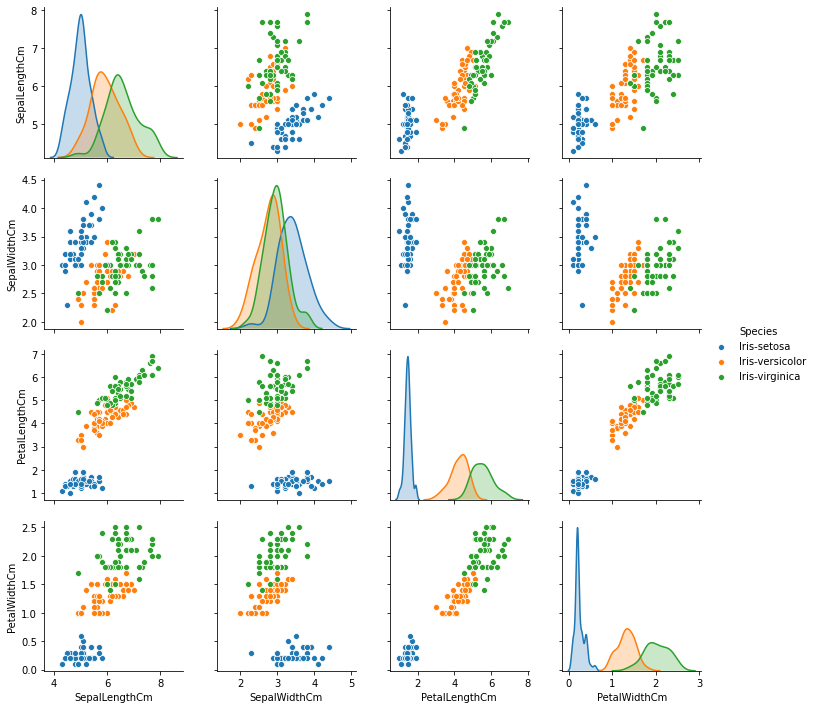

In [8]:
sns.pairplot(data=df,hue="Species")

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz

In [10]:
X=df.drop(labels=["Species"],axis=1)
Y=df["Species"]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [14]:
model = DecisionTreeClassifier(max_depth = 4, 
                             random_state = 0).fit(X,Y)

# Feature Importance.

In [15]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [16]:
importances

,feature,importance
3,PetalWidthCm,0.935
2,PetalLengthCm,0.051
0,SepalLengthCm,0.014
1,SepalWidthCm,0.000


In [17]:
from sklearn.metrics import classification_report,auc,accuracy_score,f1_score,precision_score,confusion_matrix,roc_auc_score,roc_curve

In [18]:
print('accuracy: ',accuracy_score(Y,model.predict(X)))

accuracy:  0.9933333333333333


In [19]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import sklearn

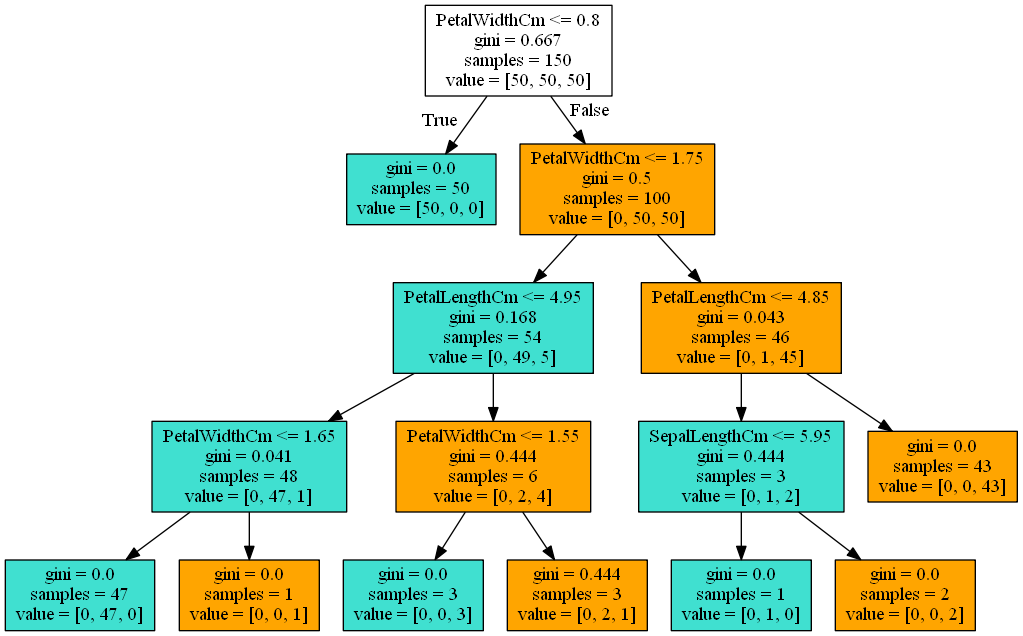

In [20]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import collections
#draw graph
#In[]
dot_data=export_graphviz(model,out_file=None,feature_names=(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']),filled=True)
#draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
colors=('turquoise','orange')  
edges=collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest=graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
                                               
Image(graph.create_png())